In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
# read csv file as pandas dataframe 
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.iloc[:,0:8].values
X


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
# k-mean cluster algorithm
def kmeans(X, k):
  # Create list who insert those which are belonging to that cluster
  clusters = np.zeros(X.shape[0])
  
  centroids = np.random.choice(len(X),k)
  while len(set(centroids)) != k:
      centroids = np.random.choice(len(X),k)
  np.sort(centroids)
  
  centroids = [X[i] for i in centroids]    # take random points centeroid of cluster

  # print('Enter while')
  while True:
    # for each datapoint
    for i,row in enumerate(X):
      minimum_distance = float('inf')
      distance = 0.0
      # dist of datapoint from centroid
      for j,cen in enumerate(centroids):
        distance = np.sqrt(np.sum((row-cen)**2))

        # store cloestest centroid
        # print('check dist')
        if minimum_distance > distance:
          minimum_distance = distance
          clusters[i] = j

    
    new_cen = pd.DataFrame(X).groupby(by=clusters).mean().values
    # if centroid are same then break loop else calculate again
    if np.count_nonzero(centroids - new_cen) == 0:
      # print('break while')
      break
    else:
      centroids = new_cen
  return centroids, clusters



In [6]:
# for decide k value or analysis the value of k
# use within clusters sum of squares
def cal_sse(info, centroids, clusters):
  total = 0

  for i, value in enumerate(info):
    total += np.sqrt((centroids[int(clusters[i]), 0] - value[0])**2 +
                     (centroids[int(clusters[i]), 1] - value[1])**2)
  return total



In [7]:
centroids, clusters = kmeans(X, 2)

In [12]:
centroids

array([[3.55555556e+00, 1.17000000e+02, 6.66666667e-01, 2.00000000e+00,
        6.94444444e-01, 2.57638889e+01, 3.93166667e-01, 3.04444444e+01],
       [3.85526316e+00, 1.06657895e+02, 7.19210526e+01, 3.04342105e+01,
        5.26315789e-01, 3.22605263e+01, 3.97039474e-01, 3.03552632e+01],
       [2.41600000e+00, 9.65680000e+01, 6.79200000e+01, 2.58880000e+01,
        6.73280000e+01, 3.02592000e+01, 4.83640000e-01, 2.69680000e+01],
       [4.56666667e+00, 1.43233333e+02, 7.87000000e+01, 3.03333333e+00,
        0.00000000e+00, 2.97233333e+01, 4.12366667e-01, 5.55333333e+01],
       [3.84210526e+00, 1.52368421e+02, 7.14210526e+01, 2.95526316e+01,
        3.11894737e+02, 3.47736842e+01, 5.41868421e-01, 3.33421053e+01],
       [6.40425532e+00, 1.09595745e+02, 8.28936170e+01, 3.38297872e+00,
        0.00000000e+00, 3.07063830e+01, 4.22914894e-01, 4.80212766e+01],
       [3.47619048e+00, 1.34690476e+02, 7.24285714e+01, 3.14642857e+01,
        1.94690476e+02, 3.48107143e+01, 6.05726190e-01, 3.

In [13]:
clusters

array([10., 13.,  8.,  2.,  6., 12.,  2.,  0.,  7.,  5.,  5.,  8.,  3.,
        7.,  6.,  0.,  6., 12.,  2.,  9.,  6.,  5.,  8.,  1.,  9.,  9.,
        3.,  9.,  9.,  5.,  5.,  6.,  2., 13.,  1.,  6., 12.,  1.,  1.,
        6., 10., 12.,  5.,  6.,  8., 10., 12., 13.,  1.,  0.,  2.,  2.,
       13.,  4.,  4., 13.,  4.,  9.,  3.,  9.,  0., 12., 13.,  9., 12.,
        1.,  1.,  5.,  2.,  9.,  2.,  9.,  5.,  4., 13., 11., 13.,  1.,
        0.,  1., 12.,  0.,  2.,  1.,  3.,  9.,  1.,  2.,  9.,  1., 13.,
        6.,  2.,  3.,  2.,  6.,  1.,  2.,  2.,  6.,  8., 12., 12.,  2.,
       13.,  9.,  5.,  9., 13.,  2.,  9.,  7.,  2., 13.,  6.,  3., 12.,
       13.,  1.,  2.,  9.,  1.,  9.,  3., 12.,  2.,  9.,  9.,  9.,  5.,
        6., 12.,  6.,  1.,  2.,  9.,  2.,  2., 12.,  4.,  3.,  1.,  2.,
        5.,  4.,  1., 13.,  9.,  3., 13.,  6., 12.,  9.,  7.,  8., 10.,
        2.,  9.,  2.,  9., 10.,  9.,  4.,  1., 12.,  9., 10., 12., 12.,
        2.,  5.,  9.,  0.,  2.,  2.,  9., 13.,  9.,  3., 12., 13

In [14]:
# elbow method to decide value of k
sse_list = []
for K in range(1,15):
  centroids, clusters = kmeans(X, K)
  sse=0
  for k in range(K):
    sse+=np.sum((clusters[k+1]-centroids[k,:])**2)
  sse_list=np.append(sse_list,sse)
  

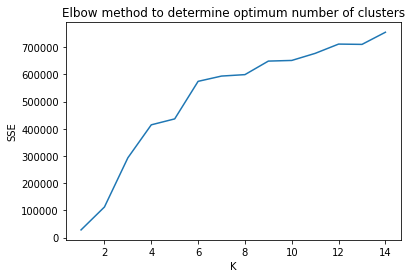

In [15]:
# decide k in K_mean
K_array=np.arange(1,15)
plt.plot(K_array,sse_list)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [16]:
k = 2
centroids, clusters = kmeans(X, k)

In [17]:
centroids

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ]])